In [3]:
import numpy as np
from scipy.signal import correlate, correlation_lags
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":16})

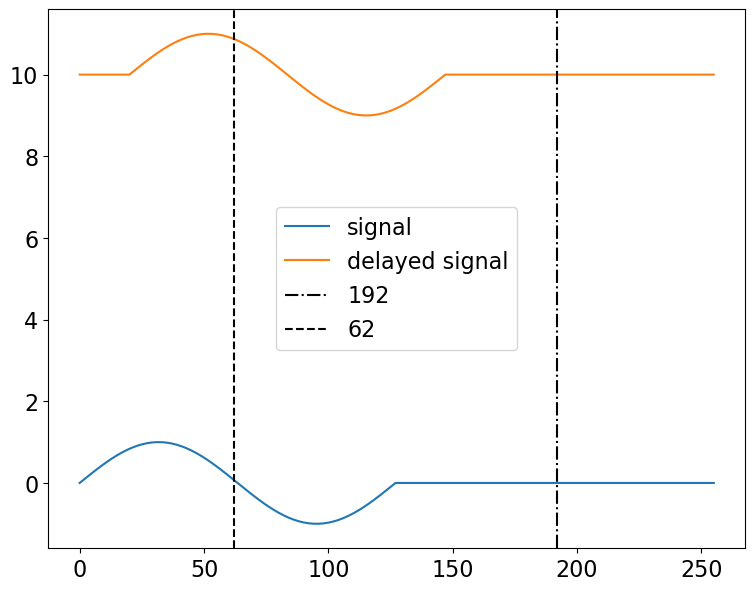

In [66]:
signal_length = 256
pulse_length = 128
delay = 20

sig1 = np.zeros(signal_length)
sig2 = np.zeros(signal_length)
# make a single sine wave in the first half of signal 1
sig1[:pulse_length] = np.sin(np.linspace(0,2 * np.pi, pulse_length))
# for signal 2, delay the sine wave by 20 samples
sig2[delay:delay+pulse_length]=sig1[:pulse_length]
sig2+=10

fig, ax = plt.subplots(1, figsize=(9,7))
ax.plot(sig1,label='signal')
ax.plot(sig2,label='delayed signal')
ax.axvline(192, color='k', ls='-.', label='192')
ax.axvline(62, color='k', ls='--', label='62')
ax.legend()
fig.savefig("img/two_signals_dc.png")

In [80]:
c = correlate(sig1,sig2)
l = correlation_lags(len(sig1),len(sig2))
corr_ncc = correlate(sig1/np.sqrt(np.sum(sig1**2)), sig2/np.sqrt(np.sum(sig2**2)))
corr_zncc = correlate((sig1-np.mean(sig1))/np.std(sig1), (sig2-np.mean(sig2))/np.std(sig2)) / signal_length

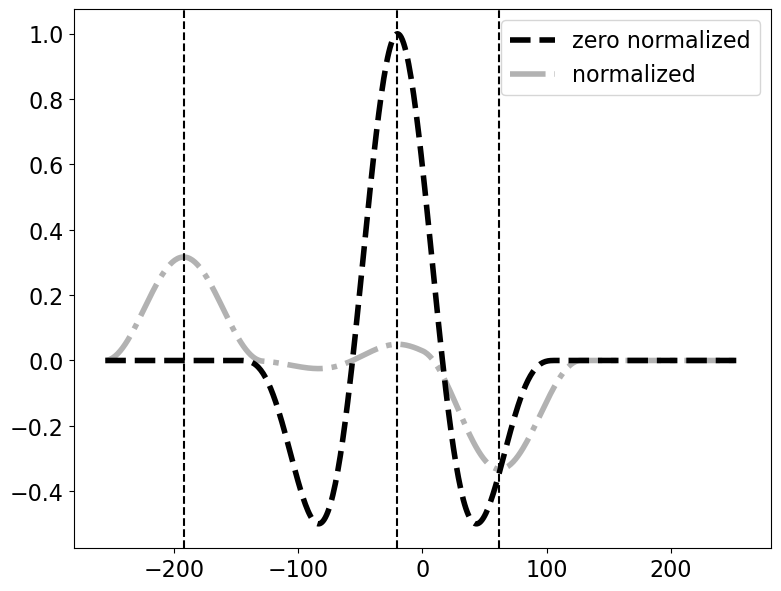

In [81]:
fig, ax = plt.subplots(1, figsize=(9,7))
ax.plot(l,corr_zncc, 'k--', lw=4, label='zero normalized')
ax.plot(l,corr_ncc, 'k-.',alpha=0.3, lw=4, label='normalized')
ax.axvline(-20,c='k',ls='--')
ax.axvline(-192,c='k',ls='--')
ax.axvline(62,c='k',ls='--')
ax.legend()
fig.savefig("img/with_dc_ncc_vs_zncc.png")